In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import decimal
from tqdm import tqdm
from scipy.optimize import curve_fit
from timeit import default_timer as timer

In [2]:
#constant function
def const_func(data):
    return 30

In [3]:
#the sum of elements
def sum_func(data):
    value = 0
    for i in range(len(data)):
        value += data[i]
    return value

In [4]:
#the product of elements
def prod_func(data):
    value = 1
    for i in range(len(data)):
        value = value * data[i]
    return value

In [5]:
#calculation polynomial by direct computation 
def poly_func(data):
    x = decimal.Decimal(1.5) #use lib decimal to avoid overflow
    value = 0
    for i in range(len(data)):
        value += decimal.Decimal(data[i]) * decimal.Decimal(x) ** decimal.Decimal((i))
    return value

In [6]:
#calculation polynomial by Horner method 
def poly_horner_func(data):
    value = 1.5
    for i in range(len(data)-1, 0, -1):
        value = value * data[i] + data[i-1]
    return value

In [7]:
def bubble_sort(data):
    i = 0
    while i < len(data) - 1:
        j = 0
        while j < len(data) - 1 - i:
            if data[j] > data[j+1]:
                data[j], data[j+1] = data[j+1], data[j]
            j += 1
        i += 1
    return data

In [8]:
def quick_sort(data):
    if len(data) <= 1:
        return data
    else:
        random_element = random.choice(data)
        less_element = []
        greater_element = []
        equal_element = []
        for i in data:
            if i < random_element:
                less_element.append(i)
            elif i > random_element:
                greater_element.append(i)
            else:
                equal_element.append(i)
        return quick_sort(less_element) + equal_element + quick_sort(greater_element)
    return data

In [9]:
def timsort (data):
    data.sort()

In [10]:
def matrix_mult(vector):
    n = len(vector)
    A = np.random.rand(n, n) #use numpy to generate random matrixe
    B = np.random.rand(n, n)
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            temp_res = 0
            for l in range(n):
                temp_res += A[i][l] * B[l][j]
            res[i][j] = temp_res
    return res

In [11]:
# estimator functions for theoretical complexity
def const_complexity(x, a):
    return np.ones_like(x) * a

def lin_complexity(x, a):
    return a*x

def square_complexity(x, a):
    return a*x**2

def cubic_complexity(x, a):
    return a*x**3

def nlog_complexity(x, a):
    return a*x*np.log(x)

In [19]:
def execution_time(n_runs, n_experiments, func):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
            v = np.random.rand(j)
            start_time = timer()
            func(v)
            times[i].append(timer() - start_time)        
    return np.array(times, dtype=np.float64).mean(axis=0)

In [20]:
def plotting(avg_time, theor_complexity, title):
    if theor_complexity == nlog_complexity:
        xdata = np.linspace(1, len(avg_time), len(avg_time)-1, dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(theor_complexity, xdata, ydata[1:])
    else:
        xdata = np.arange(len(avg_time), dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(theor_complexity, xdata, ydata)
    plt.figure(figsize=(15,7)) #determed size of graph
    plt.plot(avg_time)
    plt.title(f"Dependence of execution time on the size of the input data for {title}")
    plt.plot(xdata, theor_complexity(xdata, *popt), 'r-',
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Empirical ", "Theoretical"])
    plt.xlabel('Size of input data, n')
    plt.ylabel('Execution time, sec')
    plt.show()

In [30]:
avg_time_const = execution_time(5, 2000, const_func)
avg_time_sum = execution_time(5, 2000, sum_func)
avg_time_prod = execution_time(5, 2000, prod_func)
avg_time_poly = execution_time(5, 2000, poly_func)
avg_time_poly_horner = execution_time(5, 2000, poly_horner_func)
avg_time_bubble_sort = execution_time(5, 2000, bubble_sort)
avg_time_quick_sort = execution_time(5, 2000, quick_sort)
avg_time_timsort = execution_time(5, 2000, timsort)
avg_time_matrix_mult = execution_time(5, 200, matrix_mult)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [17:11<00:00,  5.16s/it]


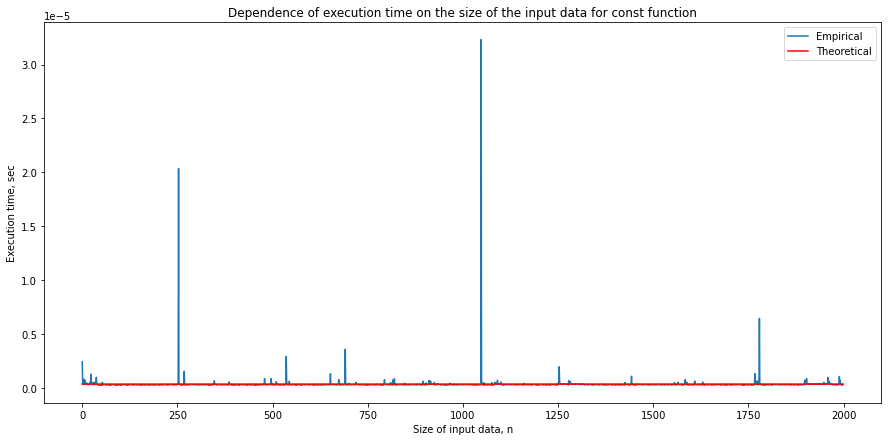

In [31]:
plotting(avg_time_const, const_complexity, "const function")

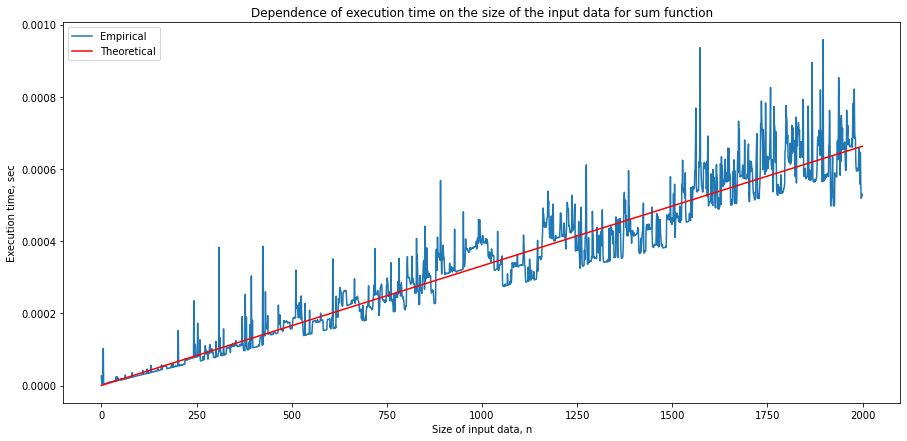

In [32]:
plotting(avg_time_sum, lin_complexity, "sum function")

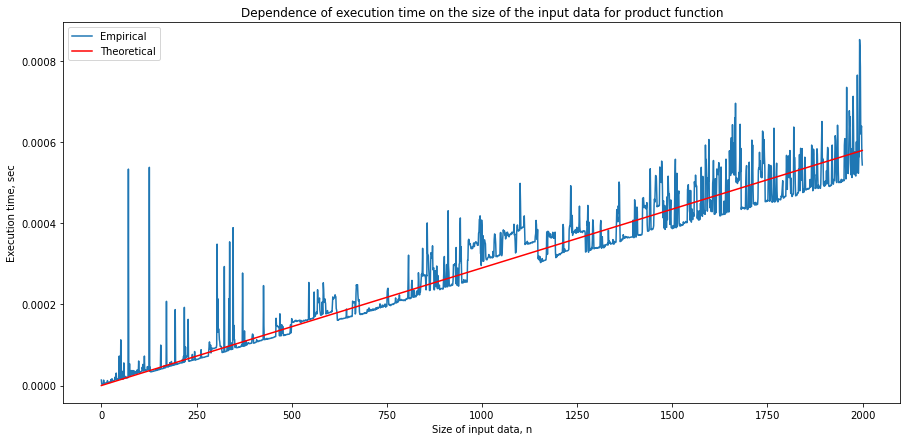

In [33]:
plotting(avg_time_prod, lin_complexity, "product function")

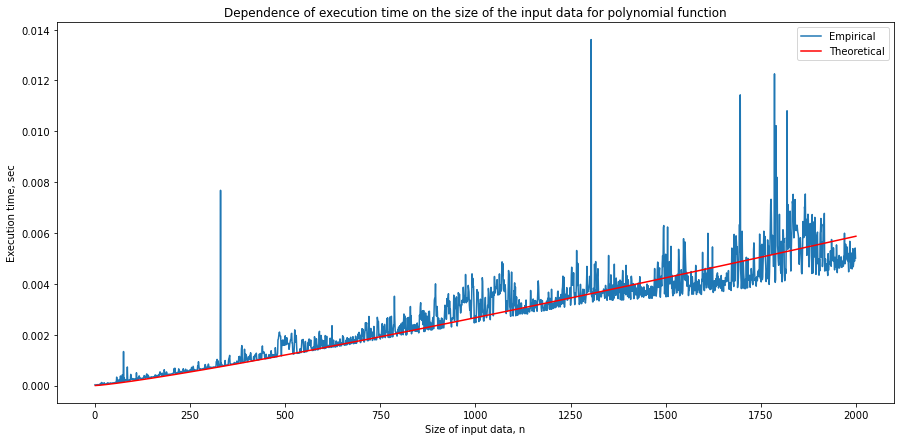

In [34]:
plotting(avg_time_poly, nlog_complexity, "polynomial function")

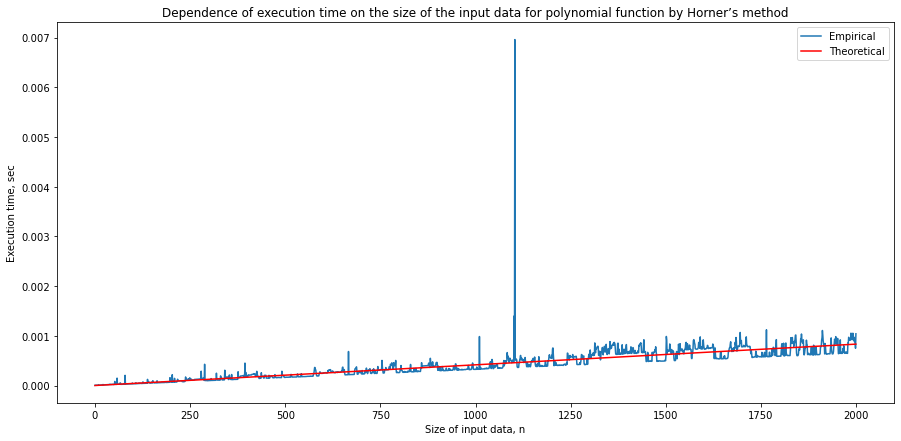

In [35]:
plotting(avg_time_poly_horner, lin_complexity, "polynomial function by Horner’s method")

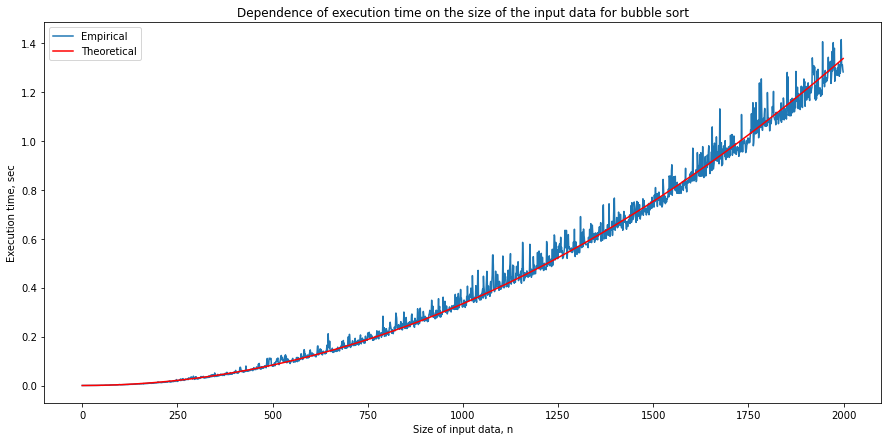

In [36]:
plotting(avg_time_bubble_sort, square_complexity, "bubble sort")

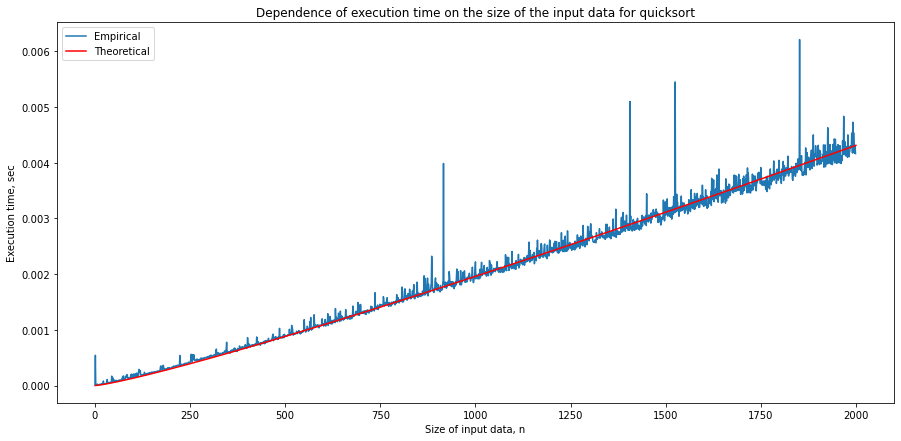

In [37]:
plotting(avg_time_quick_sort, nlog_complexity, "quicksort")

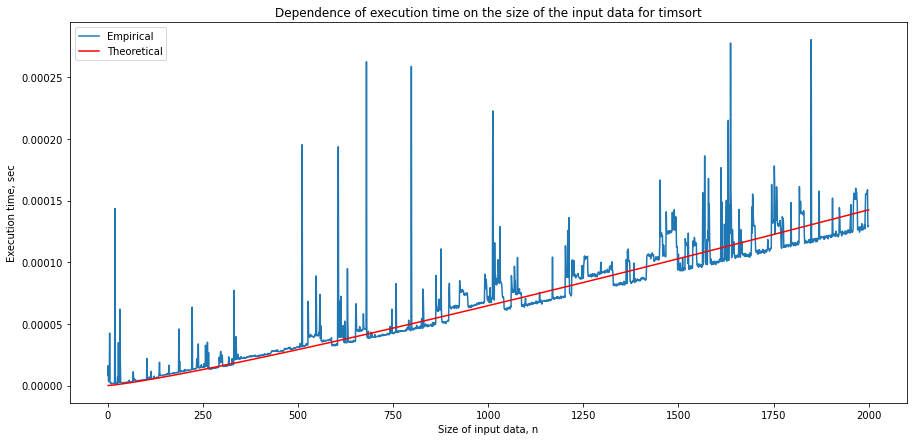

In [44]:
plotting(avg_time_timsort, nlog_complexity, "timsort")

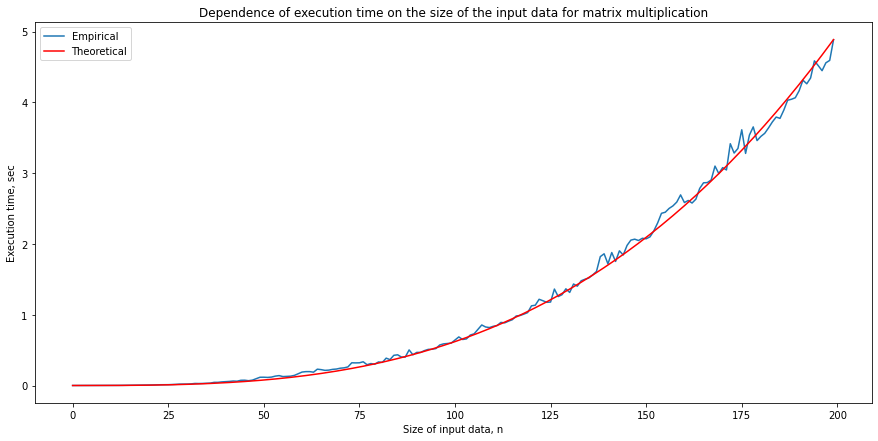

In [46]:
plotting(avg_time_matrix_mult, cubic_complexity, "matrix multiplication")